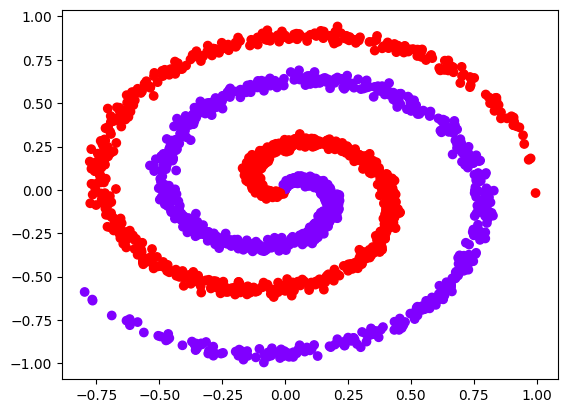

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# seperatation
def generate_spiral_data(n_points, n_classes=2, n_loops=3, offset=5):
    """ Generate n_points per class for n_classes number of spirals with n_loops number of loops """
    X = []
    y = []

    for i in range(n_classes):
        r = np.linspace(0.0, 1, n_points)  # radius
        t = (np.linspace(i * offset * n_loops, (i + 1) *
                        offset * n_loops, n_points)  + np.random.randn(n_points)) * 0.2 # theta
        X.append(np.c_[r * np.sin(t), r * np.cos(t)])
        y.append(np.ones(n_points) * i)

    X = np.concatenate(X)
    y = np.concatenate(y)
    return  np.c_[X,y]

# generate 2 spirals each with 1000 data points and 3 loops
data = generate_spiral_data(1000,  n_classes=2, n_loops=5, offset=10)
np.random.shuffle(data)

M = data[:,:2]
L = data[:,2]

# visualize data
plt.scatter(M[:, 0], M[:, 1], c=L, cmap='rainbow')
plt.show()

In [3]:
import tensorflow as tf
from collections import Counter


train = int(M.shape[0]*.80)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(M.shape[1],)),
    tf.keras.layers.Dense(5, activation='sigmoid'), # don;t change the type of activiation from sigmoid
    tf.keras.layers.Dense(10, activation='sigmoid'), # don;t change the type of activiation from sigmoid
 #   tf.keras.layers.Dense(6, activation='sigmoid'), # don;t change the type of activiation from sigmoid
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.05),
                                                loss='binary_crossentropy',
                                                metrics=['accuracy']) # don't chagne SGD, or loss
model.fit(M[:train], L[:train], epochs=10000, verbose=2)
pred = model.predict(M[train:])

print(Counter(zip(np.round(pred).T[0], L[train:])))

Streaming output truncated to the last 5000 lines.
Epoch 7502/10000
50/50 - 0s - loss: 0.0367 - accuracy: 0.9875 - 120ms/epoch - 2ms/step
Epoch 7503/10000
50/50 - 0s - loss: 0.0366 - accuracy: 0.9869 - 121ms/epoch - 2ms/step
Epoch 7504/10000
50/50 - 0s - loss: 0.0346 - accuracy: 0.9881 - 104ms/epoch - 2ms/step
Epoch 7505/10000
50/50 - 0s - loss: 0.0368 - accuracy: 0.9856 - 100ms/epoch - 2ms/step
Epoch 7506/10000
50/50 - 0s - loss: 0.0362 - accuracy: 0.9869 - 97ms/epoch - 2ms/step
Epoch 7507/10000
50/50 - 0s - loss: 0.0361 - accuracy: 0.9856 - 99ms/epoch - 2ms/step
Epoch 7508/10000
50/50 - 0s - loss: 0.0359 - accuracy: 0.9887 - 116ms/epoch - 2ms/step
Epoch 7509/10000
50/50 - 0s - loss: 0.0379 - accuracy: 0.9869 - 123ms/epoch - 2ms/step
Epoch 7510/10000
50/50 - 0s - loss: 0.0373 - accuracy: 0.9869 - 127ms/epoch - 3ms/step
Epoch 7511/10000
50/50 - 0s - loss: 0.0355 - accuracy: 0.9887 - 100ms/epoch - 2ms/step
Epoch 7512/10000
50/50 - 0s - loss: 0.0350 - accuracy: 0.9875 - 106ms/epoch - 2ms